#  <center> Airnline: Passenger Satisfaction</center>

The data comes from Kaggle and refers to the evaluation of customer satisfaction regarding flights that includes waiting times, travel and services during the flight among other points.

Source: https://www.kaggle.com/datasets/yakhyojon/customer-satisfaction-in-airline


## Library import and data loading

In this analysis, we utilized Python as our primary programming language and Jupyter Notebook as the integrated development environment (IDE) to conduct data exploration and analysis. Before delving into the dataset, we imported the essential libraries that we used in this project. 

In [59]:
# Some libraries are loaded that will be used below
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cluster import KMeans
import warnings
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score


### Handling   missing values 

In [60]:
#Load csv file
data=pd.read_csv('Invistico_Airline.csv') 
df=pd.DataFrame(data)

#Remove all rows that contain NaN values in the original Dataframe
df.dropna(inplace=True)

#Reset the index for the original DataFrame. 
df.reset_index(drop=True,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

In [61]:
#Overview of the first 10 records
df.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0000000000
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0000000000
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0000000000
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0000000000
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0000000000
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0000000000
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0000000000
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0000000000
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0000000000
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0000000000


In [62]:
#Total rows and columns

df.shape

(129487, 23)

## EDA
The meaning of the content of each of the columns that will be analyzed is explained below.


* `satisfaction`:     whether a passenger is satisfied or not (dependent variable).
* `gender`: whether a passenger is male or female.
* `Customer type`: whether a passenger is loyal or disloyal.
* `Age`: passenger's age from 7-85.                                
* `Type of Travel`: either business or personal.                 
* `Class`: airline's type of classes: business, economy plus or economy.
* `Flight Distance`: distance the flight of a passenger has taken.
* `Seat comfort`: passenger's rating of how comfortable the seat is from 5 being the highest and 0 being the lowest.
* `Departure/Arrival time convenient`: passenger's rating of how convenient the departure/arrival time by the airline is from 5 being the highest and 0 being the lowest.
* `Food and drink`: passenger's rating of how good the food is from 5 being the highest and 0 being the lowest.            
* `Gate location`: passenger's rating of how convenient the gate location is in the airport from 5 being the highest and 0 being the lowest.        
* `Inflight wifi service`: passenger's rating of how stable the in-flight wifi is from 5 being the highest and 0 being the lowest. 
* `Inflight entertainment`: passenger's rating of how good the in-flight entertainment is from 5 being the highest and 0 being the lowest.             
* `Online support`: passenger's rating of how helpful the online support of the airline is from 5 being the highest and 0 being the lowest.         
* `Ease of Online booking`: passenger's rating of how easy it is to book a flight through the airline from 5 being the highest and 0 being the lowest. 
* `On-board service`: passenger's rating of how great the service on board is from 5 being the highest and 0 being the lowest. 
* `Leg room service`: passenger's rating of how comfortable the leg room of the plane is from 5 being the highest and 0 being the lowest. 
* `Baggage handling`: passenger's rating of how careful the airline is in handling their baggage from 5 being the highest and 0 being the lowest. 
* `Checkin service`: passenger's rating of how convenient the checkin service is from 5 being the highest and 0 being the lowest. 
* `Cleanliness`: passenger's rating of how clean the plane is from 5 being the highest and 0 being the lowest. 
* `Online boarding`: passenger's rating of how helpful the online boarding of the airline is from 5 being the highest and 0 being the lowest. 
* `Departure Delay in Minutes`: the delay of departure in minutes of the passenger's flight taken with the airline.
* `Arrival Delay in Minutes`: the delay of arrival in minutes of the passenger's flight taken with the airline.

### Graphs and overview

In this segment, histogram charts are generated to visualize and gain insights on the frequency of the dataset's variables.

<Axes: title={'center': 'Flight Distance Histogram'}, xlabel='Flight Distance', ylabel='Count'>

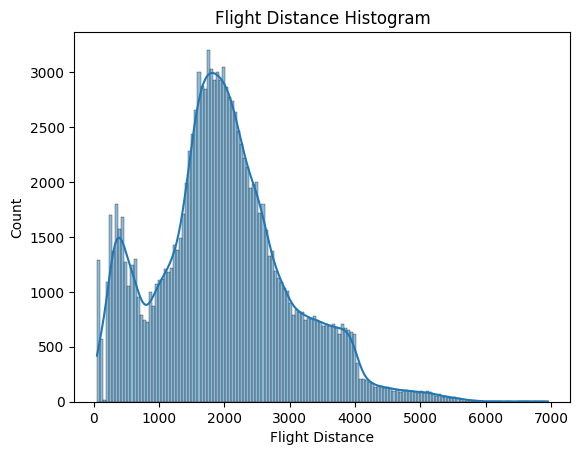

In [63]:
plt.title('Flight Distance Histogram')
sns.histplot(data=df, x='Flight Distance', kde=True)

<Axes: title={'center': 'Age Histogram'}, xlabel='Age', ylabel='Count'>

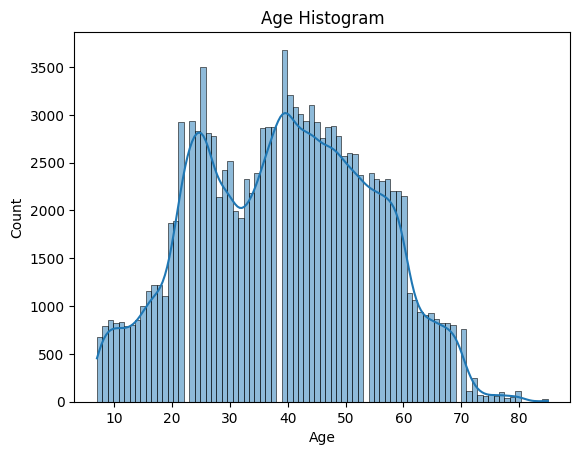

In [64]:
plt.title('Age Histogram')
sns.histplot(data=df, x='Age', kde=True)

<Axes: title={'center': 'Flight Distance Histogram with Type of Class'}, xlabel='Flight Distance', ylabel='Count'>

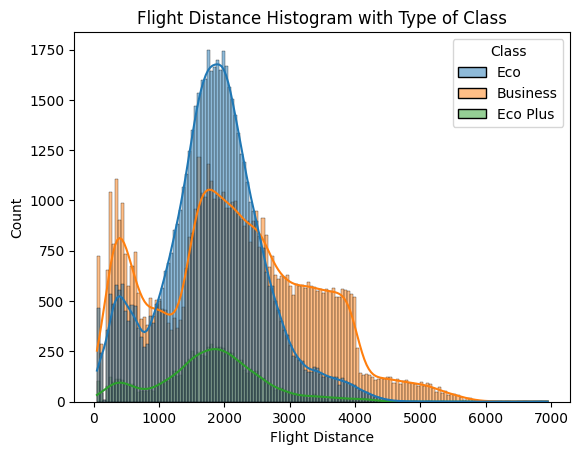

In [65]:
plt.title('Flight Distance Histogram with Type of Class')
sns.histplot(data=df, x='Flight Distance', hue='Class', kde=True)

<Axes: title={'center': 'Flight Distance Histogram with Satisfaction'}, xlabel='Flight Distance', ylabel='Count'>

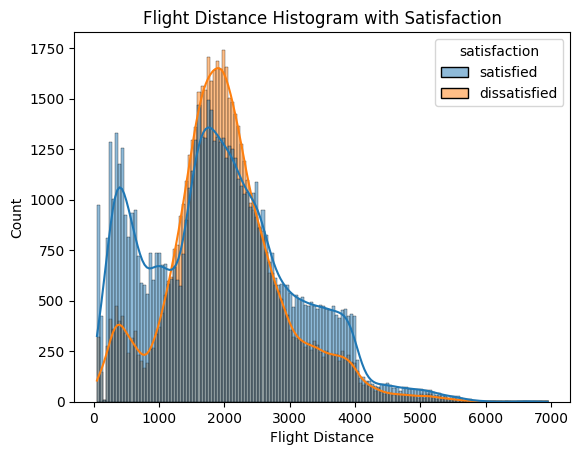

In [66]:
plt.title('Flight Distance Histogram with Satisfaction')
sns.histplot(data=df, x='Flight Distance', hue='satisfaction', kde=True)

<Axes: title={'center': 'Flight Distance Histogram with Type of Travel'}, xlabel='Flight Distance', ylabel='Count'>

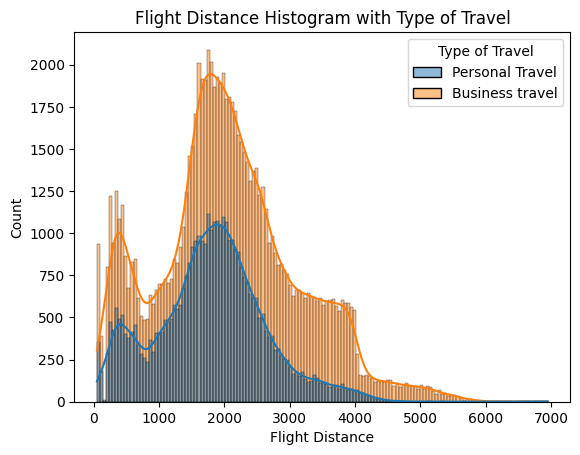

In [67]:
plt.title('Flight Distance Histogram with Type of Travel')
sns.histplot(data=df, x='Flight Distance', hue='Type of Travel', kde=True)

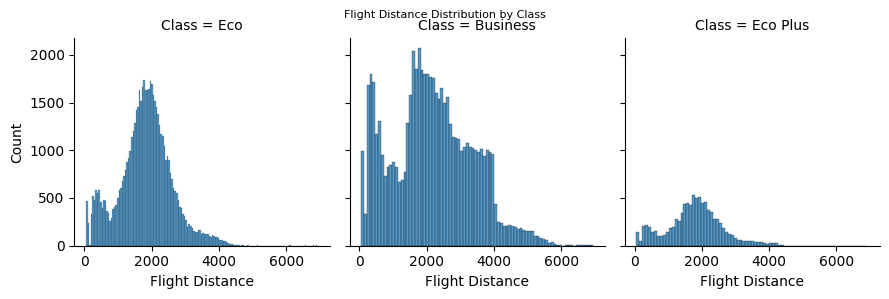

In [68]:
#plt.title('Flight Distance Histogram for each Type of Class')
g = sns.FacetGrid(df, col="Class")
g.map(sns.histplot, "Flight Distance")
g.set_titles(fontsize=12)  
g.set_axis_labels(fontsize=10)  
plt.suptitle("Flight Distance Distribution by Class", fontsize=8)
plt.show()

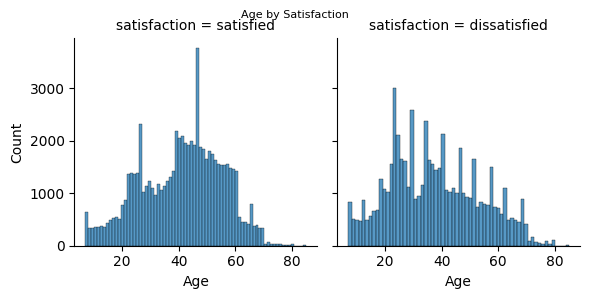

In [69]:
g = sns.FacetGrid(df, col="satisfaction")
g.map(sns.histplot, "Age");
g.set_titles(fontsize=8)  
g.set_axis_labels(fontsize=8)  
plt.suptitle("Age by Satisfaction", fontsize=8)
plt.show()

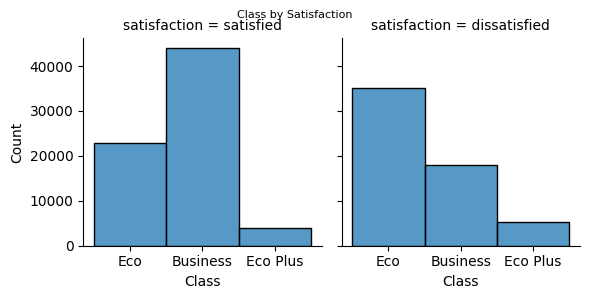

In [70]:
g = sns.FacetGrid(df, col="satisfaction")
g.map(sns.histplot, "Class")
g.set_titles(fontsize=8)  
g.set_axis_labels(fontsize=8)  
plt.suptitle("Class by Satisfaction", fontsize=8)
plt.show()


Text(0.5, 1.0, 'Evaluation Seat Comfort')

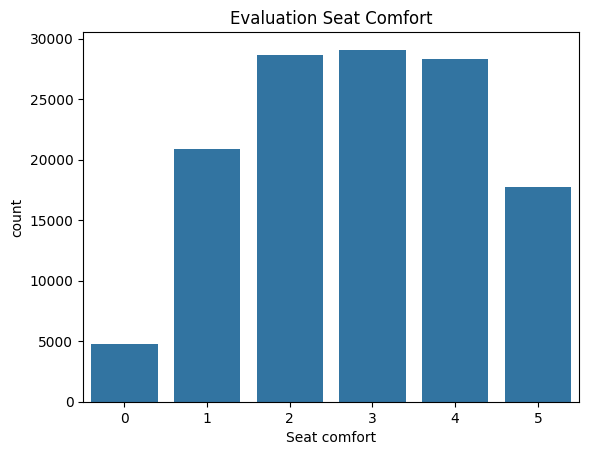

In [71]:
sns.countplot(data=df, x='Seat comfort');
plt.title('Evaluation Seat Comfort')

Text(0.5, 1.0, 'Evaluation Gate Location')

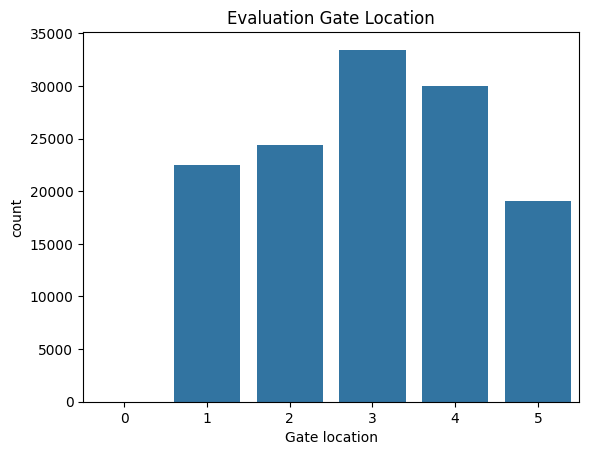

In [72]:
sns.countplot(data=df, x='Gate location')
plt.title('Evaluation Gate Location')

Text(0.5, 1.0, 'Evaluation Inflight Wifi Service')

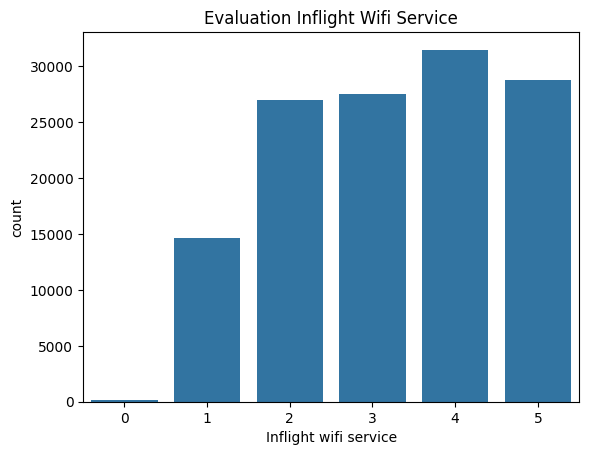

In [73]:
sns.countplot(data=df, x='Inflight wifi service')
plt.title('Evaluation Inflight Wifi Service')

Text(0.5, 1.0, 'Evaluation Inflight Entertainment')

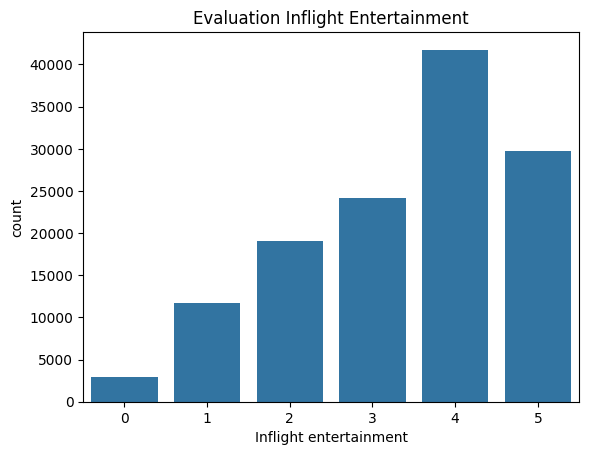

In [74]:

sns.countplot(data=df, x='Inflight entertainment');
plt.title('Evaluation Inflight Entertainment')

Text(0.5, 1.0, 'Age vs Departure Delay in Minutes with Class')

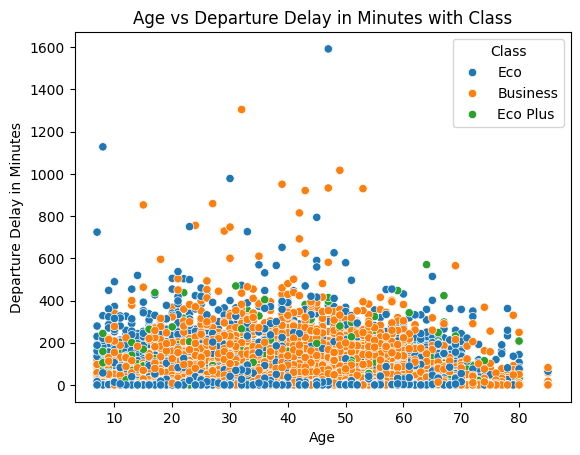

In [75]:
sns.scatterplot(data=df, x='Age', y='Departure Delay in Minutes', hue='Class')
plt.title('Age vs Departure Delay in Minutes with Class')

Text(0.5, 1.0, 'Age vs Arrival Delay in Minutes with Class')

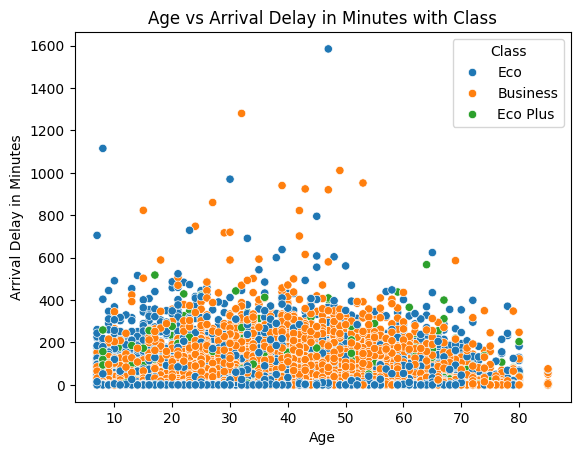

In [76]:
sns.scatterplot(data=df, x='Age', y='Arrival Delay in Minutes', hue='Class')
plt.title('Age vs Arrival Delay in Minutes with Class')

### Correlation Matrix

A correlation matrix performed on this analysis provides a comprehensive overview of the relationships between pairs of variables in our dataset. It assesses the strength and direction of linear associations between variables.

C:\Users\sergi\AppData\Local\Temp\ipykernel_21004\2164059668.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


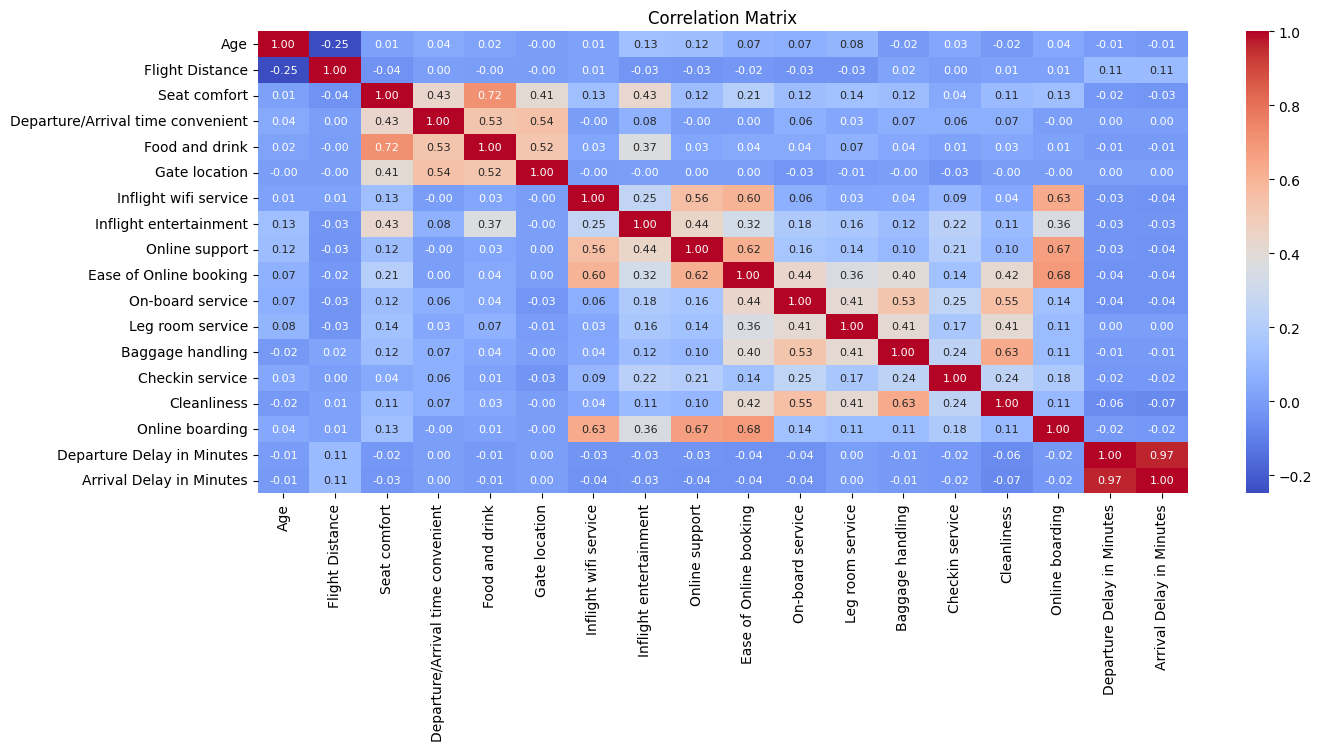

In [77]:
#Create correlation matix

#data_subset = df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
#correlation_matrix = data_subset.corr()
correlation_matrix = df.corr()

plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 8})
plt.title('Correlation Matrix')
plt.show()


### Transform Categorical Data

In this part, the categorical data was transformed into dummy variables. The columns that was transformed are 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink','Gate location', 'Inflight wifi service', 'Inflight entertainment','Online support', 'Ease of Online booking', 'On-board service','Leg room service', 'Baggage handling', 'Checkin service','Cleanliness', and 'Online boarding'.

In [78]:
# Identify categorical features and add columns to transform

categorical_columns = list(df.select_dtypes('object').columns)

In [79]:
# Create dummy variables for each categorical feature

for column in categorical_columns:
    # Create dummy variables with a prefix
    dummy_columns = pd.get_dummies(df[column], prefix=column, drop_first=True)
    # Convert True/False to 1/0
    dummy_columns = dummy_columns.astype(int)
    # Add the dummy columns to the original DataFrame
    df = pd.concat([df, dummy_columns], axis=1)
    # Drop the original categorical column from the DataFrame
    df.drop(column, axis=1, inplace=True)

# Display the modified DataFrame with dummy variables
#print("\nDataFrame with dummy variables:")
df.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,3,2,0,0.0000000000,1,0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,3,2,310,305.0000000000,1,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,2,0,0.0000000000,1,0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,3,0,0.0000000000,1,0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,2,5,0,0.0000000000,1,0,0,1,1,0


In [80]:
#After transformation, new dataframe content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129487 non-null  int64  
 1   Flight Distance                    129487 non-null  int64  
 2   Seat comfort                       129487 non-null  int64  
 3   Departure/Arrival time convenient  129487 non-null  int64  
 4   Food and drink                     129487 non-null  int64  
 5   Gate location                      129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Inflight entertainment             129487 non-null  int64  
 8   Online support                     129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  On-board service                   129487 non-null  int64  
 11  Leg room service                   1294

In [81]:
#Change name of columns

df.rename(columns={'satisfaction_satisfied': 'Satisfaction'}, inplace=True)
df.rename(columns={'Gender_Male': 'Male'}, inplace=True)
df.rename(columns={'Class_Eco': 'Class Eco/Business'}, inplace=True)
df.rename(columns={'Type of Travel_Personal Travel': 'Type of Travel Personal/Business'}, inplace=True)

  

In [82]:
#After the transformation is the new number of records and columns
df.shape

(129487, 24)

Next, the case will be evaluated with three machine learning algorithms: Naive Bayes, Decision Tree and KMeans. The first two correspond to Classification algorithms and KMean is Clustering.

# Applying Classification Method: Naive Bayes

Since we have a generous amount of categorical data, we chose to apply the Naive Bayes classification method. This involves utilizing an approach to predict the class or category of instances based on the features available.

In [83]:
#The split is carried out, leaving the satisfaction variable as the dependent variable.

features = df.drop(['Satisfaction'], axis=1)
response = df['Satisfaction']
features.shape

(129487, 23)

### Features Selection with LogisticRegression

We created a pipeline that first selects the optimal features using logistic regression as the estimator and then scales the data using standardization. This pipeline can be used to preprocess the data efficiently before training the Classifier Naive Bayes model we also created after this part.

In [84]:
# Create pipeline that applys selection Clasification and Standard Scaler, first to select the optimal features and then scale the data 

pipe_lr= Pipeline([
    ('logistic_regression', SelectFromModel(estimator = LogisticRegression(max_iter=5000))),
    ('Standard_scaler', StandardScaler())
])
 
pipe_lr.fit(features, response)

Pipeline(steps=[('logistic_regression',
                 SelectFromModel(estimator=LogisticRegression(max_iter=5000))),
                ('Standard_scaler', StandardScaler())])

In [85]:
# Saving the selected feautures with transformations 
X_1= pipe_lr.transform(features)
X_1.shape

(129487, 6)

In [86]:
#Get the features selected 
features_selected_lr = pipe_lr['logistic_regression'].get_support(indices=True)

selected_feature_names_lr = features.columns[features_selected_lr]
#Create a new dataframe with features selected
df_features_selected_lr = pd.DataFrame(X_1, columns=selected_feature_names_lr)
#df_features_selected_lr.head()
df_features_selected_lr.columns

Index(['Inflight entertainment', 'Male', 'Customer Type_disloyal Customer',
       'Type of Travel Personal/Business', 'Class Eco/Business',
       'Class_Eco Plus'],
      dtype='object')

## Classifier Naive Bayes Model

The creation of the model:

In [87]:
# With the selected and scaled features, the split of the training and testing data is carried out, with 20% for training

X_train, X_test, y_train, y_test = train_test_split( X_1, response, test_size=0.20, random_state=42)


In [88]:
#Using Gaussian Algorithm for method Naive Bayes Classifier

classifiers= [('Naive_Bayes', GaussianNB())]

clf_list=[]
list_accuracy=[]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_classifier=0

#Pipeline  and using kfold for optimization 
for n, clf in  classifiers:
    pipe_clf= Pipeline([(n,clf) ])
    score = cross_val_score(pipe_clf, X_train, y_train, cv=kf, scoring='accuracy')
    mean_score = np.mean(score)
    clf_list.append(n)
    list_accuracy.append((n, mean_score))
    
    if best_classifier < mean_score:
        best_clf_mean=mean_score
        best_clf=(n, clf)

X_2 = best_clf[1]
results = np.array(list_accuracy)
results_df = pd.DataFrame(results, columns=['Name', 'MeanScore'])
results_df

,Name,MeanScore
0,Naive_Bayes,0.7575997380668179


In [89]:
X_2.fit(X_train, y_train)

GaussianNB()

The Naive Bayes classifier predicted the class of around 81.26% of the instances in the training data across all folds of cross-validation.

## Confusion Matrix - Naive Bayes

The confusion matrix below presents a summary of the model's predictions versus the actual outcomes.

In [90]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [91]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

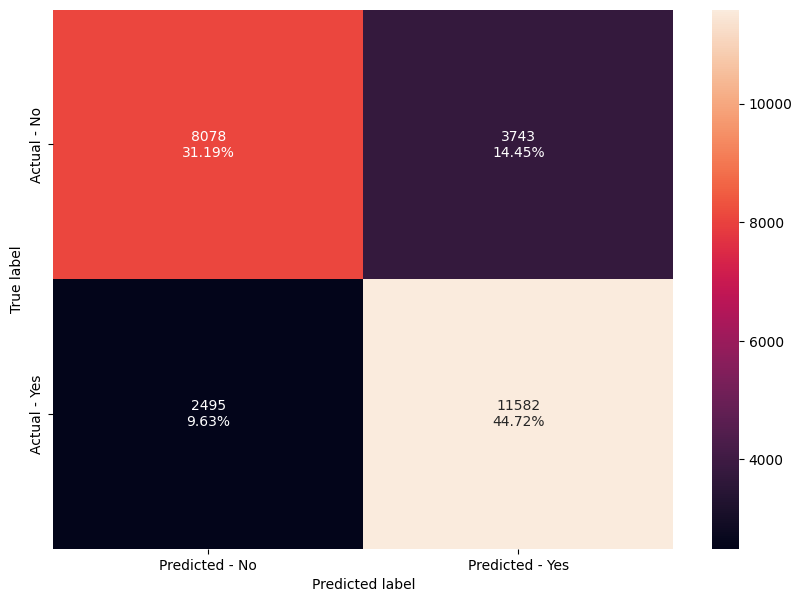

In [92]:
#Genereting Confusion Matrix

make_confusion_matrix(X_2,y_test)

Each cell in the matrix represents a specific outcome of the classification process:

* 8078 represents the number of True Negatives (TN). These are the cases where the model `correctly predicted` the negative class.
* 3743 represents the number of False Positives (FP). These are the cases where the model `incorrectly predicted` the positive class when the actual class was negative.
* 2495 represents the number of False Negatives (FN). These are the cases where the model `incorrectly predicted` the negative class when the actual class was positive.
* 11582 represents the number of True Positives (TP). These are the cases where the model `correctly predicted` the positive class.

In [93]:
# Accuracy on train and test
print("Accuracy on training set : ",X_2.score(X_train, y_train))
print("Accuracy on test set : ",X_2.score(X_test, y_test))
# Recall on train and test
get_recall_score(X_2)

Accuracy on training set :  0.7570977613453166
Accuracy on test set :  0.7591319793034211
Recall on training set :  0.8239239503564827
Recall on test set :  0.8227605313632166


Accuracy:

* The accuracy on the training set is approximately 75.71%. The classifier correctly predicts the class of about 75.71% of the instances in the training dataset.
* The accuracy on the test set is approximately 75.91%. The classifier correctly predicts the class of about 75.91% of the instances in the test dataset.

Recall:

* The recall on the training set is approximately 82.39%. The classifier correctly identifies about 82.39% of the positive instances in the training dataset.
* The recall on the test set is approximately 82.28%. The classifier correctly identifies about 82.28% of the positive instances in the test dataset.

## ROC Curve - Naive Bayes

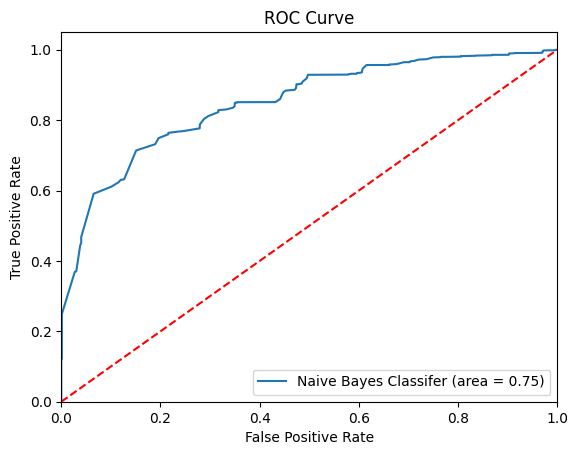

In [94]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve #plot the curve 

rf_roc_auc = roc_auc_score(y_test, X_2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, X_2.predict_proba(X_test)[:,1]) 

plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes Classifer (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The value of ROC curve of 0.75 can be considered `acceptable` because indicating that it has a some ability to distinguish between the positive and negative classes.

# Applying Classification Method: Decision Tree

Next method that we chose is the classification method: Decision Tree, which is also good with categorical data.

In [95]:
# Using the optimal features scaled in previous steps

X_train, X_test, y_train, y_test = train_test_split( X_1, response, test_size=0.20, random_state=42)

## Build Decision Tree Model

In [96]:
#Using Decision Tree Algorithm for method Decision Tree Classifier

classifiers= [('Decision_Tree', DecisionTreeClassifier(max_depth=5, random_state=0))]
 
clf_list=[]
list_accuracy=[]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_classifier=0

#Pipeline  and using kfold for optimization 
for n, clf in  classifiers:
    pipe_clf= Pipeline([(n,clf) ])
    score = cross_val_score(pipe_clf, X_train, y_train, cv=kf, scoring='accuracy')
    mean_score = np.mean(score)
    clf_list.append(n)
    list_accuracy.append((n, mean_score))
    
    if best_classifier < mean_score:
        best_clf_mean=mean_score
        best_clf=(n, clf)

X_2 = best_clf[1]
results = np.array(list_accuracy)
results_df = pd.DataFrame(results, columns=['Name', 'MeanScore'])
results_df

,Name,MeanScore
0,Decision_Tree,0.842657013094744


The mean score of 0.8427 suggests that the Decision Tree classifier performed well in predicting the target variable in the dataset. 

In [97]:
X_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

## Confusion Matrix - Decision Tree

In [98]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [99]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

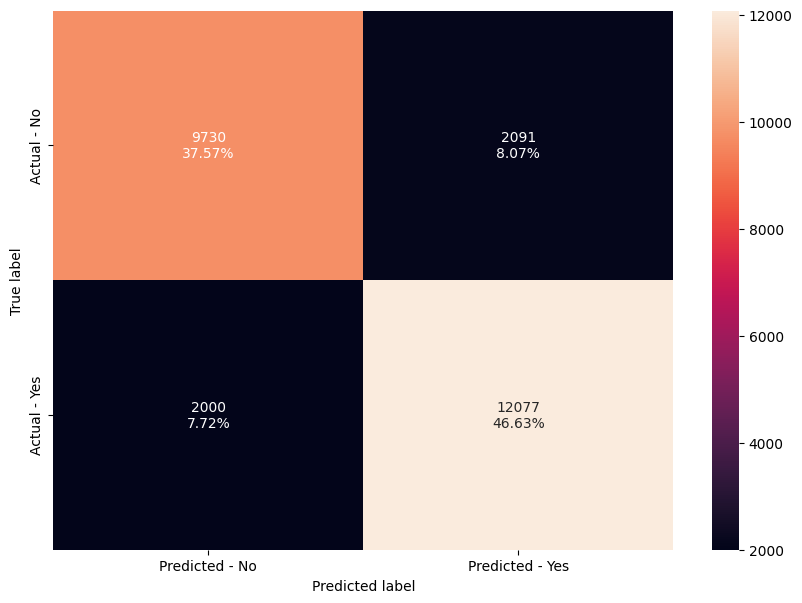

In [100]:

make_confusion_matrix(X_2,y_test)

Each cell in the matrix represents a specific outcome of the classification process:

* 9730 represents the number of True Negatives (TN). These are the cases where the model `correctly predicted` the negative class.
* 2091 represents the number of False Positives (FP). These are the cases where the model `incorrectly predicted` the positive class when the actual class was negative.
* 2000 represents the number of False Negatives (FN). These are the cases where the model `incorrectly predicted` the negative class when the actual class was positive.
* 12077 represents the number of True Positives (TP). These are the cases where the model `correctly predicted` the positive class.

In [101]:
# Accuracy on train and test
print("Accuracy on training set : ",X_2.score(X_train, y_train))
print("Accuracy on test set : ",X_2.score(X_test, y_test))
# Recall on train and test
get_recall_score(X_2)

Accuracy on training set :  0.8426763459440674
Accuracy on test set :  0.8420341339099544
Recall on training set :  0.8574773347416601
Recall on test set :  0.857924273637849


Accuracy:

* The accuracy on the training set is approximately 84.27%. The classifier correctly predicts the class of about 84.27% of the instances in the training dataset.
* The accuracy on the test set is approximately 84.20%. The classifier correctly predicts the class of about 84.20% of the instances in the test dataset.

Recall:

* The recall on the training set is approximately 85.75%. The classifier correctly identifies about 85.75% of the positive instances in the training dataset.
* The recall on the test set is approximately 85.79%. The classifier correctly identifies about 85.79% of the positive instances in the test dataset.


## ROC Curve - Decision Tree

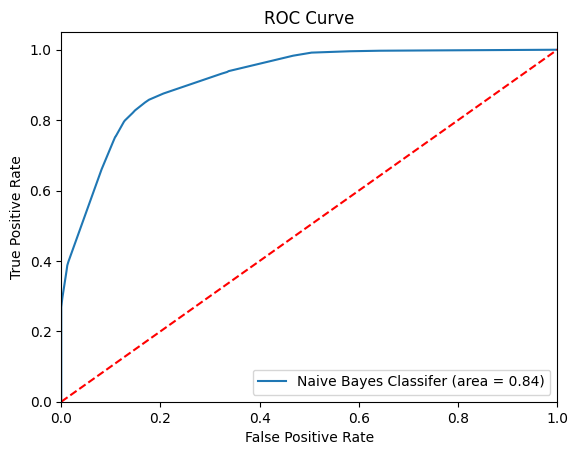

In [102]:

rf_roc_auc = roc_auc_score(y_test, X_2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, X_2.predict_proba(X_test)[:,1]) 

plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes Classifer (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The value of ROC curve of 0.84 can be considered `good` range because indicating that it has a strong ability to distinguish between the positive and negative classes.

## Visualizing the Decision Tree

This graphical representation of the trained decision tree model provides valuable insights into how the model makes decisions and can help interpret its behavior. 

In [103]:

feature_names = list(df_features_selected_lr.columns)
feature_names


['Inflight entertainment',
 'Male',
 'Customer Type_disloyal Customer',
 'Type of Travel Personal/Business',
 'Class Eco/Business',
 'Class_Eco Plus']

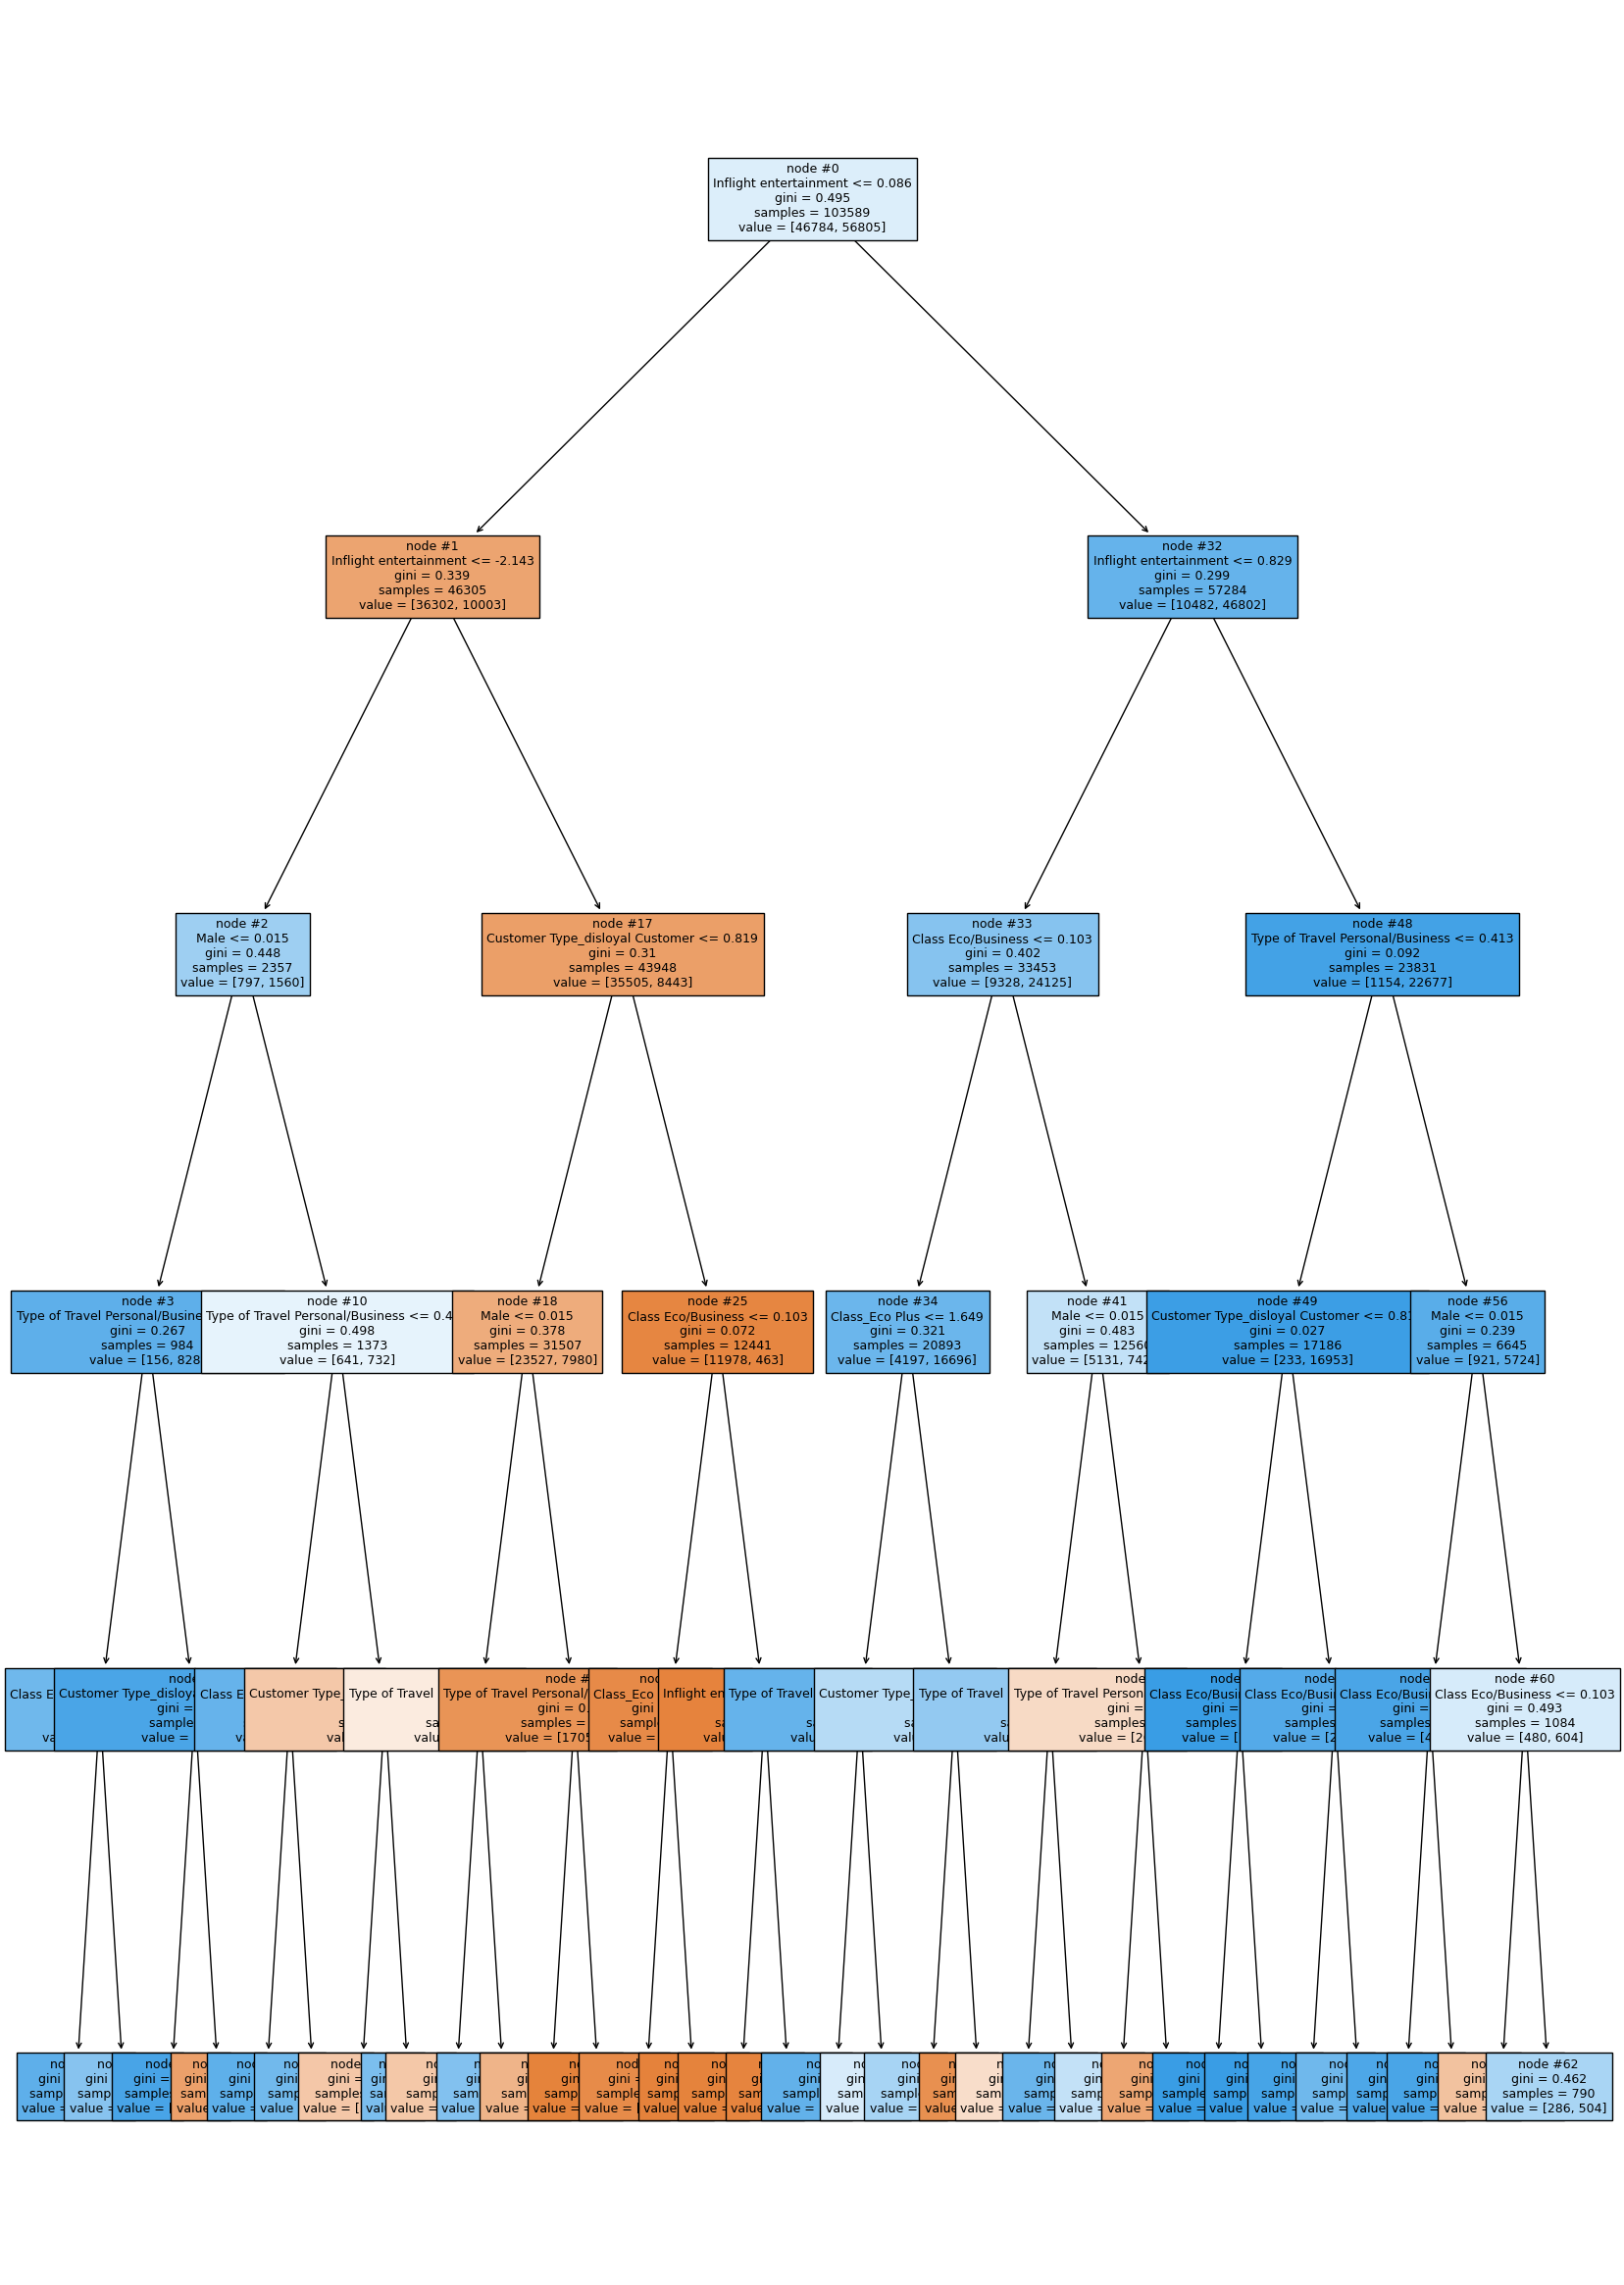

In [104]:
#Plot Decision Tree according to output algorith and max_depth=5

plt.figure(figsize=(20,30))
tree.plot_tree(X_2,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
plt.show()

Below is the importance of each variables in predicting the target variable.

In [105]:
# Text report showing the rules of a decision tree -

print(tree.export_text(X_2,feature_names=feature_names,show_weights=True))


|--- Inflight entertainment <= 0.09
|   |--- Inflight entertainment <= -2.14
|   |   |--- Male <= 0.01
|   |   |   |--- Type of Travel Personal/Business <= 0.41
|   |   |   |   |--- Class Eco/Business <= 0.10
|   |   |   |   |   |--- weights: [50.00, 270.00] class: 1
|   |   |   |   |--- Class Eco/Business >  0.10
|   |   |   |   |   |--- weights: [75.00, 191.00] class: 1
|   |   |   |--- Type of Travel Personal/Business >  0.41
|   |   |   |   |--- Customer Type_disloyal Customer <= 0.82
|   |   |   |   |   |--- weights: [27.00, 366.00] class: 1
|   |   |   |   |--- Customer Type_disloyal Customer >  0.82
|   |   |   |   |   |--- weights: [4.00, 1.00] class: 0
|   |   |--- Male >  0.01
|   |   |   |--- Type of Travel Personal/Business <= 0.41
|   |   |   |   |--- Class Eco/Business <= 0.10
|   |   |   |   |   |--- weights: [48.00, 254.00] class: 1
|   |   |   |   |--- Class Eco/Business >  0.10
|   |   |   |   |   |--- weights: [48.00, 171.00] class: 1
|   |   |   |--- Type of Travel 

In [106]:

# Set the display format for float numbers to 5 decimal places
pd.options.display.float_format = '{:.10f}'.format

# Create a DataFrame with feature importances and sort by importance in descending order
df_importances = pd.DataFrame(X_2.feature_importances_, columns=["Imp"], index=df_features_selected_lr.columns)
df_importances_sorted = df_importances.sort_values(by='Imp', ascending=False)

# Print the sorted DataFrame with 5 decimal places
print(df_importances_sorted)


                                          Imp
Inflight entertainment           0.7555965652
Type of Travel Personal/Business 0.0917864041
Male                             0.0853142157
Customer Type_disloyal Customer  0.0342029956
Class Eco/Business               0.0272110254
Class_Eco Plus                   0.0058887941


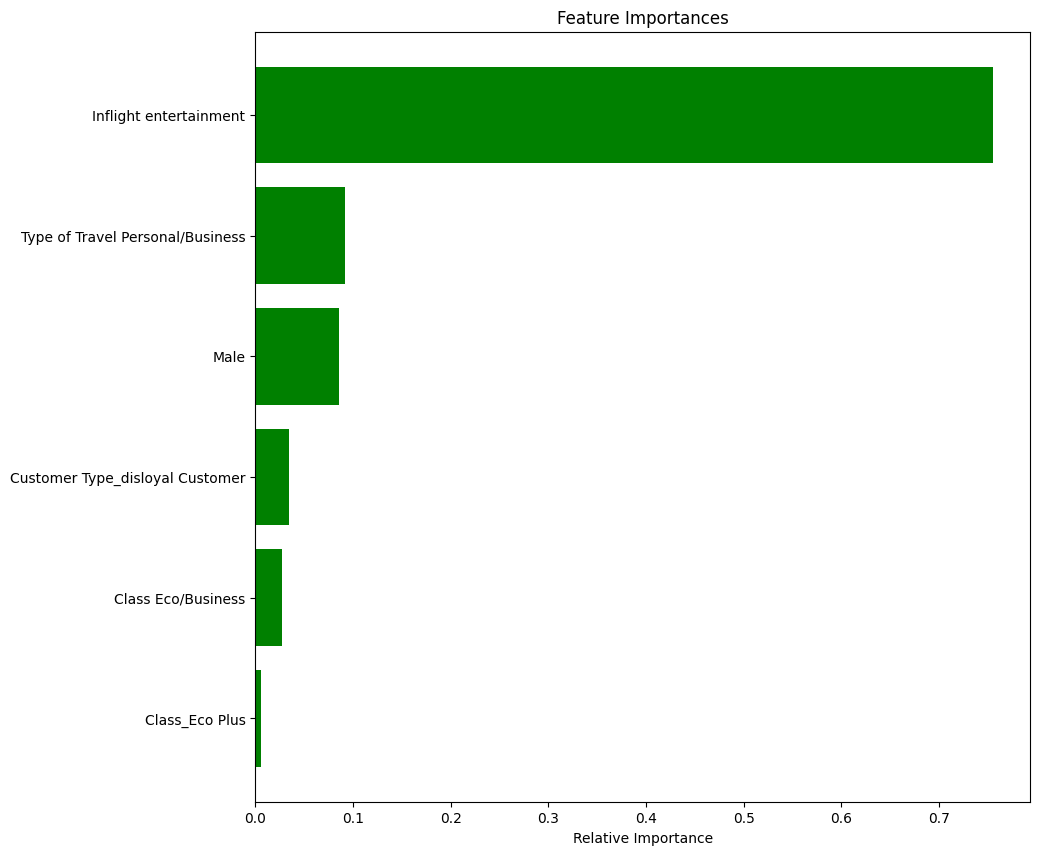

In [136]:
#Plot horizontal bar about features importance

importances = X_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=10)
plt.xlabel('Relative Importance')
plt.show()

The previous graph shows which are the most important features, and where `Inflight Entertainment` stands out, which has 75.56% relevance compared to the other variables.

# Clustering Method: KMeans

The third method that we chose is clustering methos: KMeans. It is a versatile algorithm for partitioning datasets into clusters based on similarity.

In [108]:

data = pd.read_csv("Invistico_Airline.csv")
df=pd.DataFrame(data)

#Remove all rows that contain NaN values in the original Dataframe
df.dropna(inplace=True)

#Reset the index for the original DataFrame. 

df.reset_index(drop=True,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

In [109]:
df.head(10)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0000000000
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0000000000
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0000000000
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0000000000
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0000000000
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0000000000
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0000000000
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0000000000
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0000000000
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0000000000


In [110]:
# Create dummy variables for each categorical feature
for column in categorical_columns:
    # Create dummy variables with a prefix
    dummy_columns = pd.get_dummies(df[column], prefix=column, drop_first=True)
    # Convert True/False to 1/0
    dummy_columns = dummy_columns.astype(int)
    # Add the dummy columns to the original DataFrame
    df = pd.concat([df, dummy_columns], axis=1)
    # Drop the original categorical column from the DataFrame
    df.drop(column, axis=1, inplace=True)

# Display the modified DataFrame with dummy variables
#print("\nDataFrame with dummy variables:")
df.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,3,2,0,0.0000000000,1,0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,3,2,310,305.0000000000,1,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,2,0,0.0000000000,1,0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,3,0,0.0000000000,1,0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,2,5,0,0.0000000000,1,0,0,1,1,0


In [111]:
#Change name of columns

df.rename(columns={'satisfaction_satisfied': 'Satisfaction'}, inplace=True)
df.rename(columns={'Gender_Male': 'Male'}, inplace=True)
df.rename(columns={'Class_Eco': 'Class Eco/Business'}, inplace=True)
df.rename(columns={'Type of Travel_Personal Travel': 'Type of Travel Personal/Business'}, inplace=True)

In [112]:
df.head(10)

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Male,Customer Type_disloyal Customer,Type of Travel Personal/Business,Class Eco/Business,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,3,2,0,0.0000000000,1,0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,3,2,310,305.0000000000,1,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,2,0,0.0000000000,1,0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,3,0,0.0000000000,1,0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,2,5,0,0.0000000000,1,0,0,1,1,0
5,30,1894,0,0,0,3,2,0,2,2,...,4,2,0,0.0000000000,1,1,0,1,1,0
6,66,227,0,0,0,3,2,5,5,5,...,5,3,17,15.0000000000,1,0,0,1,1,0
7,10,1812,0,0,0,3,2,0,2,2,...,4,2,0,0.0000000000,1,1,0,1,1,0
8,56,73,0,0,0,3,5,3,5,4,...,4,4,0,0.0000000000,1,0,0,1,0,0
9,22,1556,0,0,0,3,2,0,2,2,...,4,2,30,26.0000000000,1,1,0,1,1,0


In [113]:
# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## Calculation Number of Clusters

These steps are to find the number of clusters (k). The chosen techniques are Elbow Method and Silhouette Score.

### Elbow Method

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

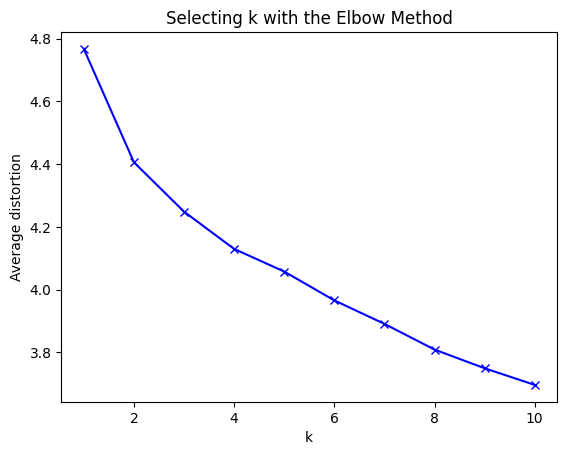

In [114]:
import warnings
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

#Finding optimal no. of clusters

# Disable the warning about the default value of `n_init`
warnings.filterwarnings('ignore', message='The default value of `n_init` will change from 10 to \'auto\' in 1.4.')

clusters=range(1,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

The Elbow Method calculation is generated but the optimal number of clusters is not clearly identified, for this reason the Silhoutte Score calculation is then applied to obtain the optimal number of clusters.

### Silhouette Score

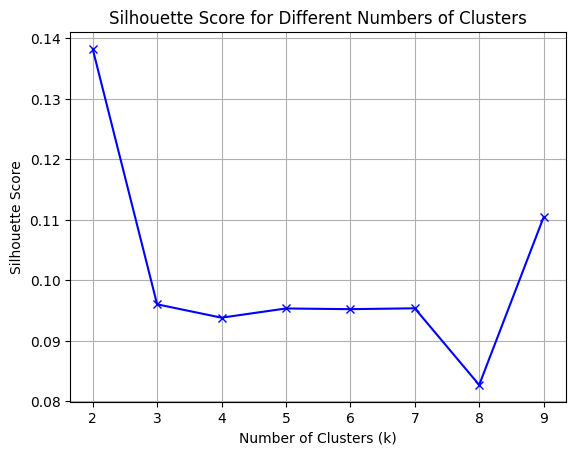

Optimal Number of Clusters: 2


In [135]:
# Finding optimal number of clusters

clusters = range(2, 10)  # Start from 2 clusters
silhouette_scores = []

for k in clusters:
    model = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=3)
    cluster_labels = model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.plot(clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Find the optimal number of clusters based on the maximum silhouette score
optimal_clusters = clusters[np.argmax(silhouette_scores)]
print(f'Optimal Number of Clusters: {optimal_clusters}')


## Build Clustering Model

After finding the k which is 2, the next step is to build the clustering model.

In [116]:
# K-means clustering
final_model = KMeans(n_clusters=2)
final_model.fit(df_scaled)
prediction = final_model.predict(df_scaled)

# Append the prediction to the original DataFrame
df["CLUSTER"] = prediction


In [134]:
#Calculate the number of records per cluster

df_clust = df.groupby(['CLUSTER'])
df_clust['Satisfaction'].count()

CLUSTER
0    57843
1    71644
Name: Satisfaction, dtype: int64

In [121]:
df_clust = df.groupby(['CLUSTER'])
df_clust.mean()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Male,Customer Type_disloyal Customer,Type of Travel Personal/Business,Class Eco/Business,Class_Eco Plus
CLUSTER,,,,,,,,,,,,,,,,,,,,,
0,37.1258579258,2021.0740625486,2.3505004927,2.8431443736,2.5477585879,2.9581453244,2.5863803745,2.5775979807,2.6742561762,2.4493197103,...,3.1715851529,2.5370053420,17.7984717252,18.5133724046,0.1811800909,0.5725152568,0.2955759556,0.3247065332,0.5790674758,0.0865446121
1,41.2880492435,1948.6617441796,3.2326503266,3.1090670538,3.0976774049,3.0164005360,3.7842666518,4.0346016414,4.2027664564,4.2979872704,...,4.1372620178,4.0109848696,12.0960722461,12.3281223829,0.8430852549,0.4280609681,0.0923594439,0.2967450170,0.3436714868,0.0610518676


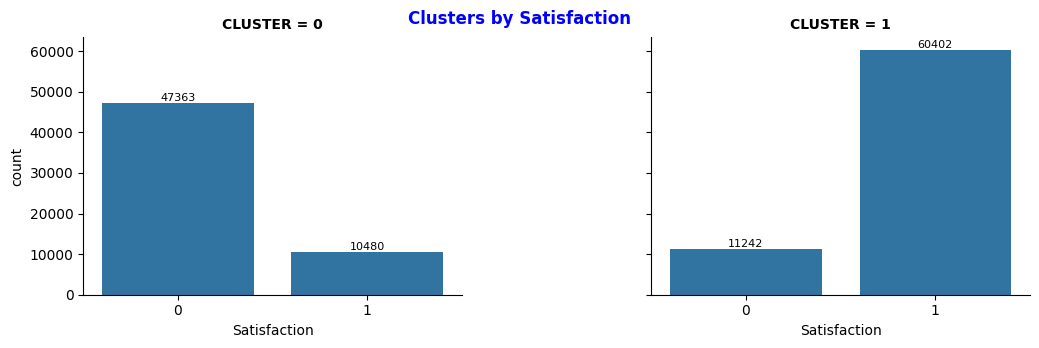

In [122]:
#Plotting the clusters


g = sns.FacetGrid(df, col="CLUSTER", height=3.5, aspect=1.5)

g.map(sns.countplot, "Satisfaction", order=[0, 1])  # Adjust bar_width as needed

g.set_titles(fontsize=6, fontweight='bold', color='black')  
g.set_axis_labels(fontsize=7)  

# Add annotations for row counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 0), 
                    textcoords='offset points')

plt.suptitle("Clusters by Satisfaction", fontsize=12, fontweight='bold', color='blue')
plt.subplots_adjust(wspace=0.5)  # Adjust the space between subplots
plt.show()


It is observed that there is a greater number of passengers with positive satisfaction in Cluster 1.

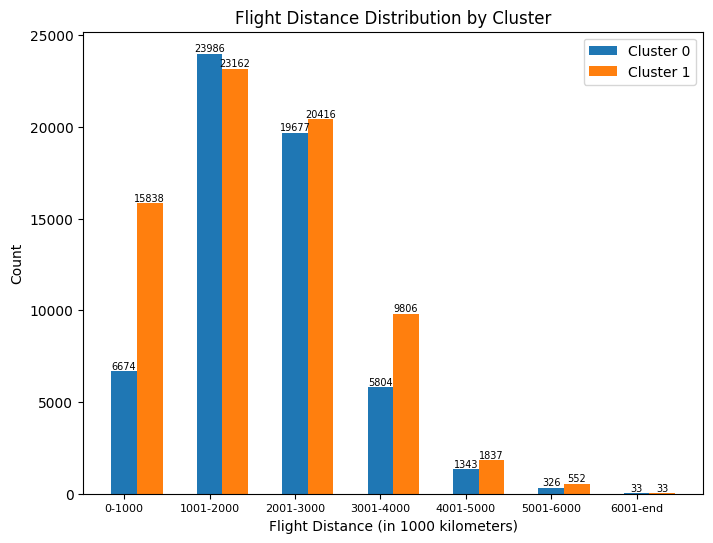

In [123]:
import matplotlib.pyplot as plt

# Group the data by Cluster
grouped_data = df.groupby('CLUSTER')

# Create bins for Flight Distance 
bins = [0, 1001, 2001, 3001, 4001, 5001, 6001, df['Flight Distance'].max() + 1]
labels = ['0-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000', '6001-end']

# Count the number of occurrences in each bin for each Cluster
hist_data = []
for cluster, data in grouped_data:
    hist, _ = np.histogram(data['Flight Distance'], bins=bins)
    hist_data.append(hist)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the size as needed (width, height)
width = 0.3
x = np.arange(len(bins) - 1)

for i, hist in enumerate(hist_data):
    ax.bar(x + i * width, hist, width=width, label=f'Cluster {i}')
    # Annotate each bar with its count
    for j, count in enumerate(hist):
        ax.annotate(count, (x[j] + i * width, count), ha='center', va='bottom', fontsize=7, color='black')

ax.set_xlabel('Flight Distance (in 1000 kilometers)')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)


ax.set_title('Flight Distance Distribution by Cluster')
plt.xticks(fontsize=8)
ax.legend()

plt.show()


It is highlighted that those customers with positive satisfaction make shorter flights, in the range of less than 1000 kilometers.

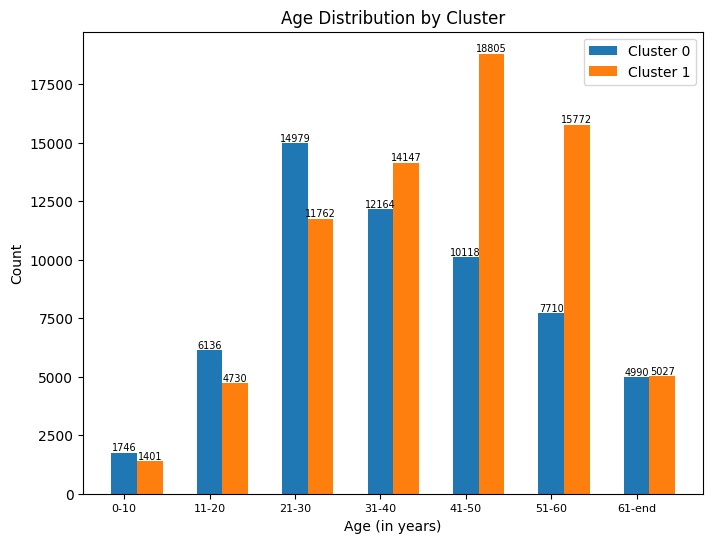

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Group the data by Cluster
grouped_data = df.groupby('CLUSTER')

# Create bins for Age 
bins = [0, 11, 21, 31, 41, 51, 61, df['Age'].max() + 1]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-end']

# Count the number of occurrences in each bin for each Cluster
hist_data = []
for cluster, data in grouped_data:
    hist, _ = np.histogram(data['Age'], bins=bins)   
    hist_data.append(hist)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the size as needed (width, height)
width = 0.3
x = np.arange(len(bins) - 1)

for i, hist in enumerate(hist_data):
    ax.bar(x + i * width, hist, width=width, label=f'Cluster {i}')
    # Annotate each bar with its count
    for j, count in enumerate(hist):
        ax.annotate(count, (x[j] + i * width, count), ha='center', va='bottom', fontsize=7, color='black')

ax.set_xlabel('Age (in years)')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_title('Age Distribution by Cluster')
plt.xticks(fontsize=8)
ax.legend()

plt.show()


It is observed in Cluster 1 that there is a greater number of passengers with ages between the ranges of 41-50 and 51-60 years.

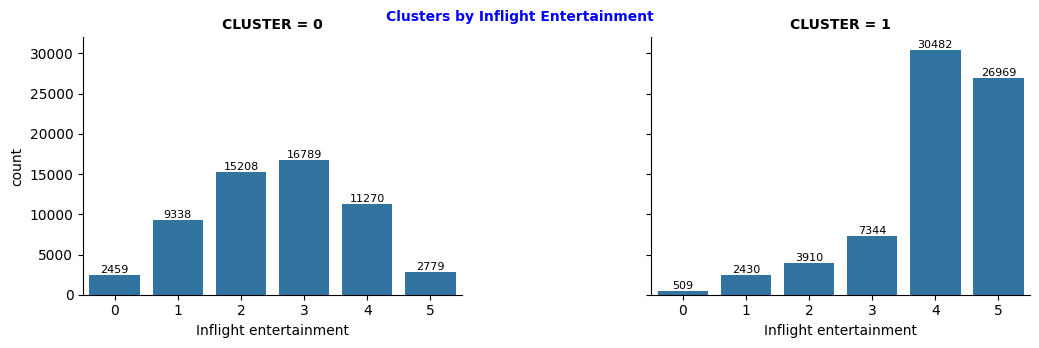

In [129]:
#Plotting the clusters by Inflight entertainment


g = sns.FacetGrid(df, col="CLUSTER", height=3.5, aspect=1.5)

g.map(sns.countplot, "Inflight entertainment", order=[0, 1, 2, 3, 4, 5])  # Adjust bar_width as needed

g.set_titles(fontsize=6, fontweight='bold', color='black')  
g.set_axis_labels(fontsize=7)  

# Add annotations for row counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 0), 
                    textcoords='offset points')

plt.suptitle("Clusters by Inflight Entertainment", fontsize=10, fontweight='bold', color='blue')
plt.subplots_adjust(wspace=0.5)  # Adjust the space between subplots
plt.show()


In Cluster 1, a greater number of passengers who have a positive evaluation of the Inflight Entertainment service with levels 4 and 5 are observed.

In [ ]:
#Plotting the clusters by Inflight entertainment


g = sns.FacetGrid(df, col="CLUSTER", height=3.5, aspect=1.5)

g.map(sns.countplot, "Type of Travel Personal/Business", order=[0, 1, 2, 3, 4, 5])  # Adjust bar_width as needed

g.set_titles(fontsize=6, fontweight='bold', color='black')  
g.set_axis_labels(fontsize=7)  

# Add annotations for row counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 0), 
                    textcoords='offset points')

plt.suptitle("Clusters by Type of Travel Personal(1)/Business(0)", fontsize=10, fontweight='bold', color='blue')
plt.subplots_adjust(wspace=0.5)  # Adjust the space between subplots
plt.show()

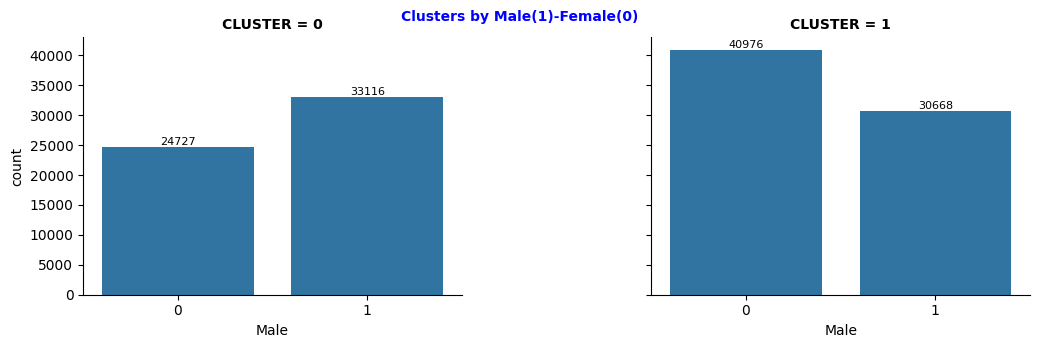

In [132]:
#Plotting the clusters by Male(1)-Female(0)

g = sns.FacetGrid(df, col="CLUSTER", height=3.5, aspect=1.5)

g.map(sns.countplot, "Male", order=[0, 1])  # Adjust bar_width as needed

g.set_titles(fontsize=6, fontweight='bold', color='black')  
g.set_axis_labels(fontsize=7)  

# Add annotations for row counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 0), 
                    textcoords='offset points')

plt.suptitle("Clusters by Male(1)-Female(0)", fontsize=10, fontweight='bold', color='blue')
plt.subplots_adjust(wspace=0.5)  # Adjust the space between subplots
plt.show()


# Conclusion and Insights

Here are some conclusions and insights in this project:

**Naive Bayes:**
   - In this first classification model, Naive Bayes is applied, precisely the GaussianNB algorithm. Where feature selection is carried out with Logistic Regression and scaling with Standard Scaler
   - The mean score was 75.76%, the accuracy on the training set was 75.71%, and the accuracy on the test set was 75.91%, which results in a model with no overfitting or underfitting behaviour.
   - These values provide insights into how the Naive Bayes model performs well in terms of accuracy, recall, and ROC curve analysis.

**Decision Tree:**
   - In the second classification model, a Decision Tree is applied, precisely the DecisionTreeClassifier algorithm, using a parameter of max_depth=5.
   - The mean score was 84.27%, the accuracy on the training set was 84.20%, and the accuracy on the test set was 84.20%, which results in a model with no overfitting or underfitting behaviour.
   - These values provide insights into how the Decision Tree model performs well in terms of accuracy, recall, and ROC curve analysis. It also has better prediction probability than the Naive Bayes model.
   - In addition, it manages to identify six features that are the most relevant in decision-making. Still, the positive evaluation of Inflight entertainment is essential in determining passenger satisfaction.

**Clustering:**
   - In this Clustering model, the K-means algorithm is precisely applied.
   - The optimal number of clusters is obtained first by calculating the Elbow method, and then to achieve better precision, the Silhouette Score is applied, generating 2 clusters as a result.
   - The most significant differences between the clusters are observed in that Cluster 1 has more passengers with positive satisfaction than Cluster 0. Concerning the ages between 41 and 50 and 51 and 60, and also those who fly long distances, less than 1000 kilometres, are mostly passengers with positive satisfaction.   
   - Regarding the most crucial feature in the Decision Tree model, which is Inflight entertainment, a correlation is observed because passengers with positive satisfaction mainly evaluate the service with scores 4 and 5, corresponding to the highest scores.

**Insights:**
   - Comparing the three models, we see it as the most optimal to use Decision Tree because it has better performance and greater prediction probability than Naive Bayes (84.20% vs 75.91%) and also generates important features for decision-making that are related to the types of features that are grouped in clusters.

